<a href="https://colab.research.google.com/github/basusankha020-hash/01_aqi_analysis/blob/main/01_aqi_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/city_day.csv')
df

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,2020-06-27,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good
29527,Visakhapatnam,2020-06-28,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory
29528,Visakhapatnam,2020-06-29,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Satisfactory
29529,Visakhapatnam,2020-06-30,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0,Satisfactory


In [ ]:
df_kolkata=df.iloc[19042:19846].copy()
df_kolkata.tail(3)

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
19843,Kolkata,2020-06-29,14.53,32.40,5.42,15.98,21.45,7.59,0.45,7.01,30.64,3.18,9.78,0.34,48.0,Good
19844,Kolkata,2020-06-30,14.00,35.85,6.25,12.29,18.12,9.64,0.37,5.66,24.59,2.46,10.75,0.27,47.0,Good
19845,Kolkata,2020-07-01,10.53,31.58,6.25,10.01,16.29,12.87,0.30,4.32,15.52,1.82,10.25,0.18,45.0,Good


In [ ]:
df_kolkata.isnull().sum()

,0
City,0
Date,0
PM2.5,53
PM10,53
NO,25
NO2,25
NOx,0
NH3,0
CO,0
SO2,54


In [ ]:
df_kolkata.columns

Index(['City', 'Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket'],
      dtype='object')

In [ ]:
df_kolkata = df.iloc[19042:19846].copy()
df_kolkata = df_kolkata[['City', 'Date', 'PM2.5', 'PM10','NO2','CO', 'SO2','AQI','AQI_Bucket']]
df_kolkata = df_kolkata.rename(columns={'PM2.5':'PM-2.5', 'PM10':'PM-10', 'AQI_Bucket': 'AQI_Status'})
df_kolkata

,City,Date,PM-2.5,PM-10,NO2,CO,SO2,AQI,AQI_Status
19042,Kolkata,2018-04-20,NaN,NaN,25.24,1.16,NaN,NaN,NaN
19043,Kolkata,2018-04-21,NaN,NaN,26.30,1.13,NaN,NaN,NaN
19044,Kolkata,2018-04-22,NaN,NaN,29.27,1.09,NaN,NaN,NaN
19045,Kolkata,2018-04-23,NaN,NaN,34.20,1.11,NaN,NaN,NaN
19046,Kolkata,2018-04-24,NaN,NaN,52.42,1.01,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
19841,Kolkata,2020-06-27,7.89,24.73,9.25,0.35,5.73,37.0,Good
19842,Kolkata,2020-06-28,10.58,25.56,12.63,0.38,5.92,43.0,Good
19843,Kolkata,2020-06-29,14.53,32.40,15.98,0.45,7.01,48.0,Good
19844,Kolkata,2020-06-30,14.00,35.85,12.29,0.37,5.66,47.0,Good


In [ ]:
df_kolkata = df_kolkata.dropna(subset=['AQI'])
df_kolkata

,City,Date,PM-2.5,PM-10,NO2,CO,SO2,AQI,AQI_Status
19099,Kolkata,2018-06-16,47.55,128.66,24.89,0.72,7.30,119.0,Moderate
19100,Kolkata,2018-06-17,45.04,107.03,40.85,1.63,1.34,113.0,Moderate
19101,Kolkata,2018-06-18,50.10,105.68,33.28,1.47,3.02,107.0,Moderate
19102,Kolkata,2018-06-19,39.25,87.24,30.86,1.35,1.93,148.0,Moderate
19103,Kolkata,2018-06-20,24.44,53.19,38.03,1.70,6.88,94.0,Satisfactory
...,...,...,...,...,...,...,...,...,...
19841,Kolkata,2020-06-27,7.89,24.73,9.25,0.35,5.73,37.0,Good
19842,Kolkata,2020-06-28,10.58,25.56,12.63,0.38,5.92,43.0,Good
19843,Kolkata,2020-06-29,14.53,32.40,15.98,0.45,7.01,48.0,Good
19844,Kolkata,2020-06-30,14.00,35.85,12.29,0.37,5.66,47.0,Good


In [ ]:
df_kolkata.isnull().sum()

,0
City,0
Date,0
PM-2.5,0
PM-10,0
NO2,0
CO,0
SO2,0
AQI,0
AQI_Status,0


In [ ]:
df_kolkata['Date'] = pd.to_datetime(df_kolkata['Date'])
df_kolkata_pivot = df_kolkata.pivot_table(index=df_kolkata['Date'].dt.year, columns=df_kolkata['Date'].dt.month, values='AQI', aggfunc='mean')
df_kolkata_pivot

Date,1,2,3,4,5,6,7,8,9,10,11,12
Date,,,,,,,,,,,,
2018,NaN,NaN,NaN,NaN,NaN,75.333333,51.612903,70.322581,83.066667,163.064516,283.666667,338.258065
2019,360.838710,266.071429,157.774194,86.800000,88.548387,71.633333,61.935484,54.064516,46.366667,125.516129,204.933333,208.903226
2020,216.935484,197.724138,122.838710,70.366667,53.161290,46.466667,45.000000,NaN,NaN,NaN,NaN,NaN


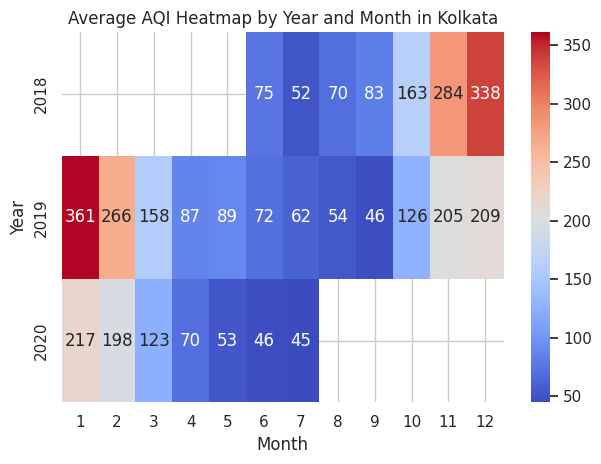

In [ ]:
sns.set_theme(style = "whitegrid")

# plot for passengers in each month of every year (a 2d array)
sns.heatmap(
    df_kolkata_pivot,
    cmap = "coolwarm",
    annot = True,  # for showing the values in each grid
    fmt = ".0f"  # shows format of data as floats with 0 decimal places
)

plt.title("Average AQI Heatmap by Year and Month in Kolkata")
plt.xlabel("Month")
plt.ylabel("Year")
plt.tight_layout()
plt.show()

In [ ]:
df_kolkata_melted

,Date,Pollutant,Value
0,2018-06-16,PM-2.5,47.55
1,2018-06-17,PM-2.5,45.04
2,2018-06-18,PM-2.5,50.10
3,2018-06-19,PM-2.5,39.25
4,2018-06-20,PM-2.5,24.44
...,...,...,...
3730,2020-06-27,SO2,5.73
3731,2020-06-28,SO2,5.92
3732,2020-06-29,SO2,7.01
3733,2020-06-30,SO2,5.66


# Task
Prepare the `df_kolkata` dataset for linear regression by converting the 'Date' column to a numerical format and defining the features and the target variable 'AQI'.

## Prepare Data for Model Training

### Subtask:
Convert the 'Date' column to a numerical format suitable for linear regression, and define the features (pollutants and numerical date) and the target variable (AQI).


**Reasoning**:
I will convert the 'Date' column to a numerical ordinal format, define the feature columns including the new ordinal date, and then separate the features (X) and target variable (y) into respective pandas objects for model training as per the instructions.



In [ ]:
df_kolkata['Date_ordinal'] = df_kolkata['Date'].apply(lambda x: x.toordinal())

features = ['PM-2.5', 'PM-10', 'NO2', 'CO', 'SO2', 'Date_ordinal']
X = df_kolkata[features]
y = df_kolkata['AQI']

print("Features (X) head:")
print(X.head())
print("\nTarget (y) head:")
print(y.head())

Features (X) head:
       PM-2.5   PM-10    NO2    CO   SO2  Date_ordinal
19099   47.55  128.66  24.89  0.72  7.30        736861
19100   45.04  107.03  40.85  1.63  1.34        736862
19101   50.10  105.68  33.28  1.47  3.02        736863
19102   39.25   87.24  30.86  1.35  1.93        736864
19103   24.44   53.19  38.03  1.70  6.88        736865

Target (y) head:
19099    119.0
19100    113.0
19101    107.0
19102    148.0
19103     94.0
Name: AQI, dtype: float64


## Split Data and Train Model

### Subtask:
Divide the prepared dataset into training and testing sets, and then train a Linear Regression model using the training data.


**Reasoning**:
I will import necessary modules from `sklearn`, split the dataset into training and testing sets, initialize a `LinearRegression` model, and then train the model using the training data, as per the instructions.



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

## Evaluate Model Performance

### Subtask:
Evaluate the trained model's performance on the test set using metrics such as R-squared, Mean Absolute Error (MAE), and Mean Squared Error (MSE).


**Reasoning**:
I will make predictions on the test set using the trained linear regression model, then calculate and print the R-squared score, Mean Absolute Error (MAE), and Mean Squared Error (MSE) to evaluate the model's performance as per the instructions.



In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"R-squared: {r2:.3f}")
print(f"Mean Absolute Error (MAE): {mae:.3f}")
print(f"Mean Squared Error (MSE): {mse:.3f}")

R-squared: 0.953
Mean Absolute Error (MAE): 15.993
Mean Squared Error (MSE): 530.379


## Visualize Predictions

### Subtask:
Create a scatter plot comparing the actual AQI values against the model's predicted AQI values to visually assess the model's accuracy.


**Reasoning**:
To visually assess the model's accuracy, I will create a scatter plot comparing the actual AQI values from `y_test` against the predicted AQI values from `y_pred`.



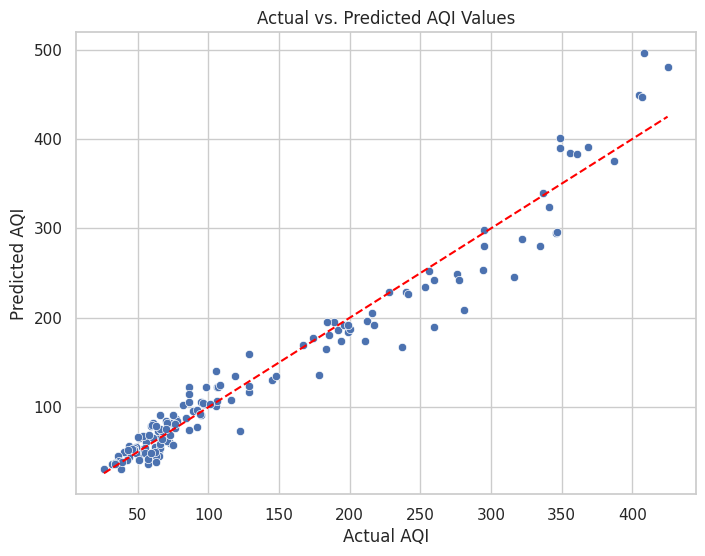

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Actual AQI')
plt.ylabel('Predicted AQI')
plt.title('Actual vs. Predicted AQI Values')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--') # Add a diagonal line for perfect prediction
plt.grid(True)
plt.show()

### Predict AQI for New Input

This section allows you to input new values for the pollutants and a date to get a predicted AQI from the trained linear regression model. Make sure the input date is in 'YYYY-MM-DD' format.

In [ ]:
import datetime

# --- Input new values for prediction ---
# You can change these values to test different scenarios
input_pm25 = 25.0
input_pm10 = 50.0
input_no2 = 30.0
input_co = 1.5
input_so2 = 8.0
input_date_str = '2023-01-15'  # Example date in YYYY-MM-DD format

# Convert the input date string to datetime object and then to ordinal
input_date_ordinal = pd.to_datetime(input_date_str).toordinal()

# Create a DataFrame for the new input, ensuring column order matches training features
new_data = pd.DataFrame([[input_pm25, input_pm10, input_no2, input_co, input_so2, input_date_ordinal]],
                          columns=features)

# Make a prediction using the trained model
predicted_aqi = model.predict(new_data)

print(f"Input Pollutant Values:")
print(f"  PM2.5: {input_pm25}")
print(f"  PM10: {input_pm10}")
print(f"  NO2: {input_no2}")
print(f"  CO: {input_co}")
print(f"  SO2: {input_so2}")
print(f"  Date: {input_date_str}")
print(f"\nPredicted AQI: {predicted_aqi[0]:.2f}")

Input Pollutant Values:
  PM2.5: 25.0
  PM10: 50.0
  NO2: 30.0
  CO: 1.5
  SO2: 8.0
  Date: 2023-01-15

Predicted AQI: 92.58


In [ ]:
!pip install streamlit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.0/9.0 MB 68.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 109.4 MB/s eta 0:00:00


### Create a Web Application for AQI Prediction using Streamlit

To create a user-friendly interface for inputting data and getting AQI predictions, we can use Streamlit. This code will create a simple web app that allows you to enter pollutant values and a date, and then it will display the predicted AQI.

**Note**: You will need to install Streamlit (`pip install streamlit`) if you haven't already. To run this app, save the following code into a Python file (e.g., `aqi_app.py`) and then execute `streamlit run aqi_app.py` in your terminal.

In [ ]:
import streamlit as st
import pandas as pd
import datetime

# Assuming 'model' and 'features' are already defined from previous steps
# If running this code separately, you would need to load your model and define features here.

st.title('Kolkata AQI Predictor')
st.write('Enter the pollutant values and date to predict the Air Quality Index (AQI).')

# Input fields for pollutants
input_pm25 = st.number_input('PM-2.5', min_value=0.0, value=25.0)
input_pm10 = st.number_input('PM-10', min_value=0.0, value=50.0)
input_no2 = st.number_input('NO2', min_value=0.0, value=30.0)
input_co = st.number_input('CO', min_value=0.0, value=1.5)
input_so2 = st.number_input('SO2', min_value=0.0, value=8.0)

# Date input
input_date = st.date_input('Date', datetime.date(2023, 1, 15))

if st.button('Predict AQI'):
    # Convert date to ordinal
    input_date_ordinal = input_date.toordinal()

    # Create a DataFrame for the new input
    new_data = pd.DataFrame([[input_pm25, input_pm10, input_no2, input_co, input_so2, input_date_ordinal]],
                              columns=features)

    # Make a prediction using the trained model
    predicted_aqi = model.predict(new_data)

    st.success(f"Predicted AQI for {input_date.strftime('%Y-%m-%d')}: **{predicted_aqi[0]:.2f}**")

# To run this app:
# 1. Save the code above to a file named `aqi_app.py`
# 2. Open your terminal or command prompt.
# 3. Navigate to the directory where you saved `aqi_app.py`.
# 4. Run the command: `streamlit run aqi_app.py`

2025-12-31 08:45:00.018 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-31 08:45:00.321 
  command:

    streamlit run /usr/local/lib/python3.12/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-12-31 08:45:00.322 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-31 08:45:00.323 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-31 08:45:00.325 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-31 08:45:00.327 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-31 08:45:00.329 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-31 08:45:00.331 Thread 'MainThread': mi

## Final Task

### Subtask:
Summarize the linear regression model's performance and insights gained from the analysis.


## Summary:

### Data Analysis Key Findings
*   The 'Date' column was successfully converted into an ordinal numerical format (`Date_ordinal`) and included in the feature set for the linear regression model.
*   A Linear Regression model was trained using the prepared data, with 80% of the dataset allocated for training and 20% for testing.
*   The model demonstrated strong predictive performance on the test set, achieving an R-squared value of 0.953, indicating that approximately 95.3% of the variance in AQI can be explained by the features.
*   The Mean Absolute Error (MAE) was 15.993, suggesting that, on average, the model's predictions were about 16 units away from the actual AQI values.
*   The Mean Squared Error (MSE) was 530.379.
*   Visual assessment through a scatter plot of actual versus predicted AQI values showed a close alignment of data points along the diagonal line, further confirming the model's accuracy.

### Insights or Next Steps
*   The current Linear Regression model provides a robust baseline for predicting AQI in Kolkata, with its high R-squared value and relatively low error metrics.
*   Further analysis could involve exploring non-linear relationships or interaction terms between pollutants, or incorporating external factors like weather data, to potentially enhance model accuracy and provide deeper insights into AQI drivers.
